In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import numpy as np

In [4]:
angles = ['0'] # angles of slopes

# Plot Joint Torque Timeseries & Histograms

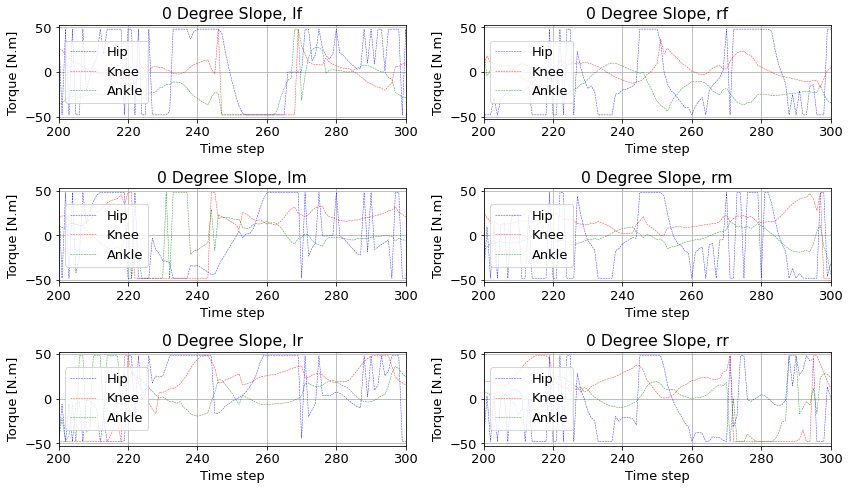

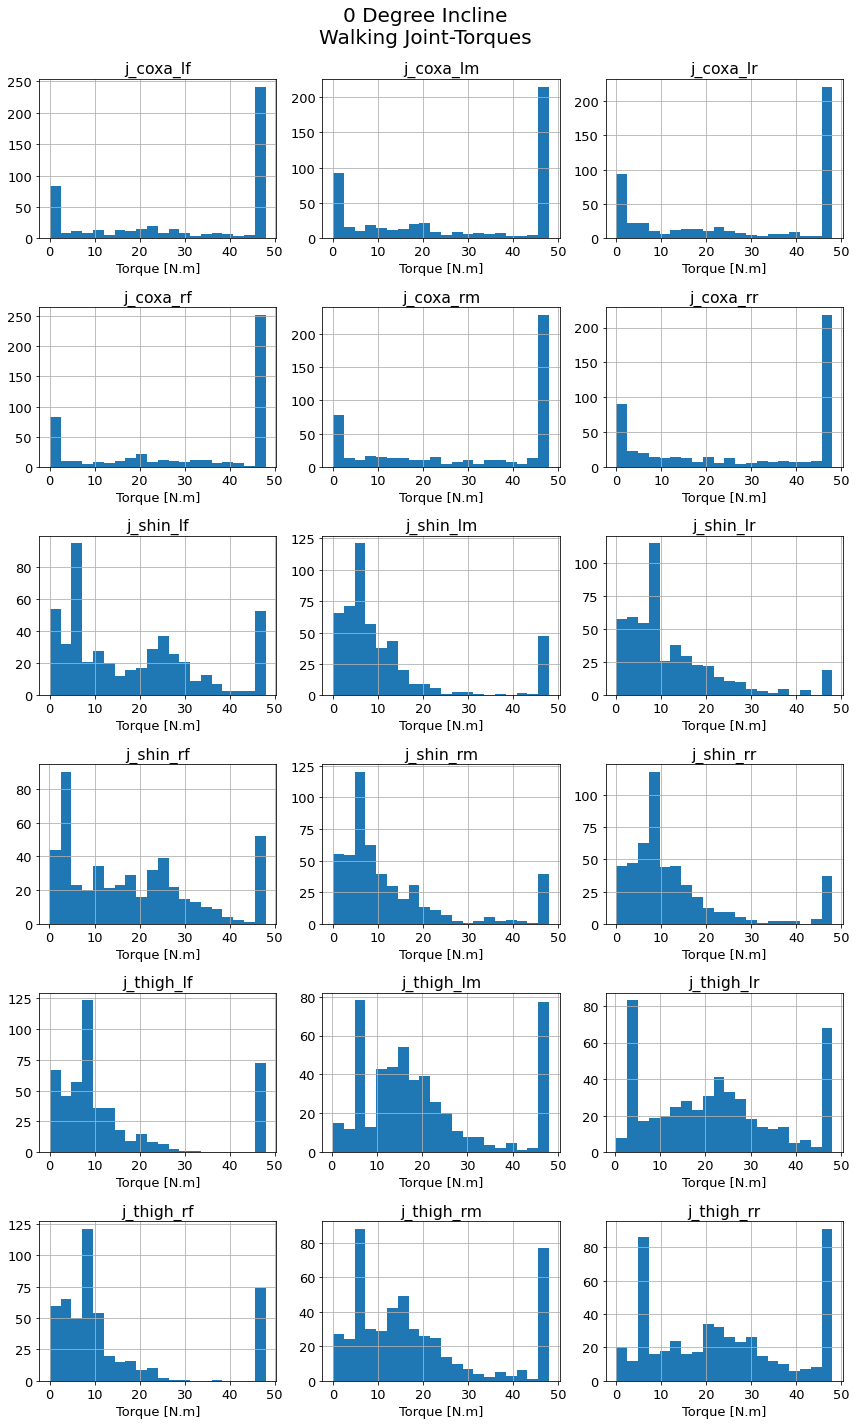

In [7]:
for a in angles:
    
    datapath = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)) + '\\Desktop\\test_bag_worms\\'
    df = pd.read_csv(datapath + '2022-06-08-15-57-40-worms-joint_states.csv')
    df['torque'] = df['.effort'].apply(ast.literal_eval).apply(np.array)
    joints = ast.literal_eval(df['.name'][0])
    globals()[f'torques_deg_{a}'] = pd.DataFrame(df['torque'].tolist(), columns = joints)

    # Plot timeseries
    # ====================================
    positions = ['lf', 'rf', 'lm', 'rm', 'lr', 'rr']
    plt.figure(figsize=(12, 7))
    plt.rcParams.update({'font.size': 13})
    for p in range(len(positions)):
        plt.subplot(3, 2, p + 1)
        plt.plot(torques_deg_0[f'j_coxa_{positions[p]}'], label = 'Hip', c = 'b', ls = '--', lw = 0.5, alpha = 0.8)
        plt.plot(torques_deg_0[f'j_thigh_{positions[p]}'], label = 'Knee', c= 'r', ls = '--', lw = 0.5, alpha = 0.8)
        plt.plot(torques_deg_0[f'j_shin_{positions[p]}'], label = 'Ankle', c = 'g', ls = '--', lw = 0.5, alpha = 0.8)
        plt.title(angles[0] + ' Degree Slope, ' + positions[p])
        plt.legend(loc='center left')
        plt.grid()
        plt.ylabel('Torque [N.m]')
        plt.xlabel('Time step')
        plt.xlim([200,300])
    plt.tight_layout()
#     plt.savefig(f'C:/Users/alexs/Dropbox (MIT)/NASA_BIG_Ideas_2022/WORMS/04_Figures/series_joint_torques_incline{a}_R1.png', dpi = 300, facecolor = 'white')
    plt.show()
    # ====================================

    # Plot histogram
    # ====================================
    plt.figure(figsize=(12, 20))
    plt.rcParams.update({'font.size': 13})
    for j in range(len(joints)):
        plt.subplot(6, 3, j + 1)
        plt.hist(np.abs(torques_deg_0[joints[j]]), bins = 20)
        plt.title(joints[j])
        plt.grid()
        plt.xlabel('Torque [N.m]')
    plt.suptitle(f'{a} Degree Incline\nWalking Joint-Torques', fontsize = 20, y = 0.99)
    plt.tight_layout()
#     plt.savefig(f'C:/Users/alexs/Dropbox (MIT)/NASA_BIG_Ideas_2022/WORMS/04_Figures/hist_joint_torques_incline{a}_R1.png', dpi = 300, facecolor = 'white')
    plt.show()
    # ====================================

In [8]:

torques_deg_0

,j_coxa_lf,j_coxa_lm,j_coxa_lr,j_coxa_rf,j_coxa_rm,j_coxa_rr,j_shin_lf,j_shin_lm,j_shin_lr,j_shin_rf,j_shin_rm,j_shin_rr,j_thigh_lf,j_thigh_lm,j_thigh_lr,j_thigh_rf,j_thigh_rm,j_thigh_rr
0,-0.416034,-0.654746,1.340116,0.102972,0.542676,-0.918947,-5.714065,-5.644609,-7.746405,-4.275214,-5.603146,-8.073469,7.937605,6.589922,4.991799,7.603367,7.043503,5.207456
1,-0.416333,-0.654296,1.339413,0.103038,0.542179,-0.918080,-5.709899,-5.636042,-7.747486,-4.271779,-5.594297,-8.074841,7.943173,6.593136,4.993246,7.609559,7.046786,5.208989
2,-0.416289,-0.653499,1.338703,0.103113,0.541370,-0.917590,-5.705613,-5.627647,-7.748821,-4.268091,-5.585316,-8.076339,7.948730,6.596385,4.994711,7.615725,7.050050,5.210539
3,-0.415935,-0.652393,1.338018,0.103219,0.540276,-0.917425,-5.701212,-5.619400,-7.750386,-4.264176,-5.576221,-8.077953,7.954274,6.599661,4.996198,7.621870,7.053300,5.212104
4,-0.415308,-0.651012,1.337358,0.103341,0.538935,-0.917544,-5.696709,-5.611282,-7.752155,-4.260059,-5.567028,-8.079671,7.959805,6.602961,4.997705,7.627994,7.056536,5.213682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,16.026257,14.314152,39.276841,48.000000,-48.000000,-48.000000,-13.965301,-2.173879,10.278314,-23.596759,7.023640,-6.891222,-0.455900,15.824870,25.895804,-48.000000,17.299944,32.214557
495,11.228883,11.270470,38.806943,48.000000,-48.000000,-48.000000,-17.736792,-0.555722,13.937766,-15.306051,1.925995,-6.275864,2.877886,16.415569,24.571386,-48.000000,21.644013,33.314902
496,5.242991,10.747667,39.566435,41.507639,-48.000000,-48.000000,-21.357639,1.117096,17.808315,-11.614897,-2.989347,-5.504261,6.496930,17.209440,23.463163,-48.000000,25.954043,34.571312
497,1.760854,10.314390,40.735845,38.295022,-48.000000,-48.000000,-23.093185,3.513532,20.679674,-8.722186,-7.530332,-5.019931,7.960915,17.308665,23.828131,-48.000000,29.935678,36.788773


In [9]:
datapath = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)) + '\\02_Data\\' + angles[0] + '_degree_slope_torques\\'
filenames = os.listdir(datapath)
joints = [f.split('phantomx-')[1].split('_position')[0] for f in filenames]

datapath + 

for n in range(len(joints)):
    if n == 0:
        globals()[f'torques_deg_{angles[0]}'] = pd.read_csv(datapath + filenames[n], header = 0) # Torque units [N.m]
        globals()[f'torques_deg_{angles[0]}'] = globals()[f'torques_deg_{angles[0]}'][['time', '.command']]
        globals()[f'torques_deg_{angles[0]}'].columns =  ['Time', f'Torque_{joints[n]}']
    elif n > 0:
        df = pd.read_csv(datapath + filenames[n], header = 0)
        df = df[['time', '.command']]
        df.columns =  ['Time', f'Torque_{joints[n]}']
        globals()[f'torques_deg_{angles[0]}'] = pd.concat([globals()[f'torques_deg_{angles[0]}'], df[f'Torque_{joints[n]}']], axis = 1)
        print(f'Merging Torque_{joints[n]} . . .')

SyntaxError: invalid syntax (<ipython-input-9-3794078291cb>, line 5)

## Plot torque timeseries and histogram

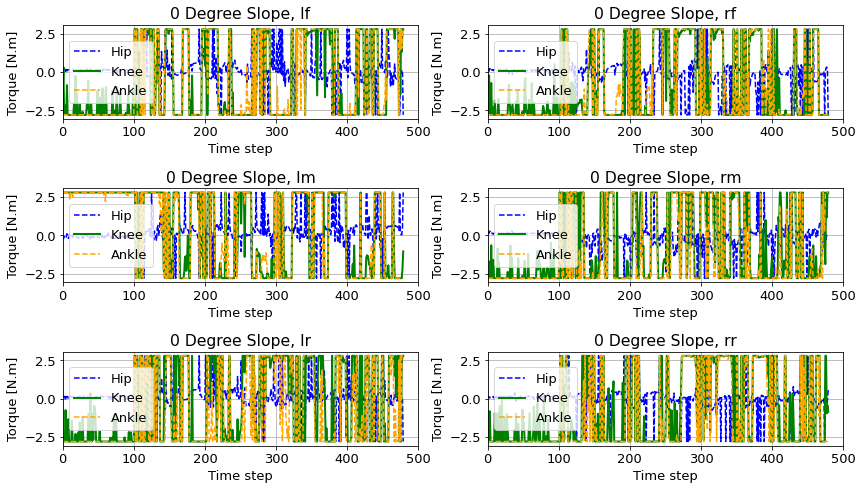

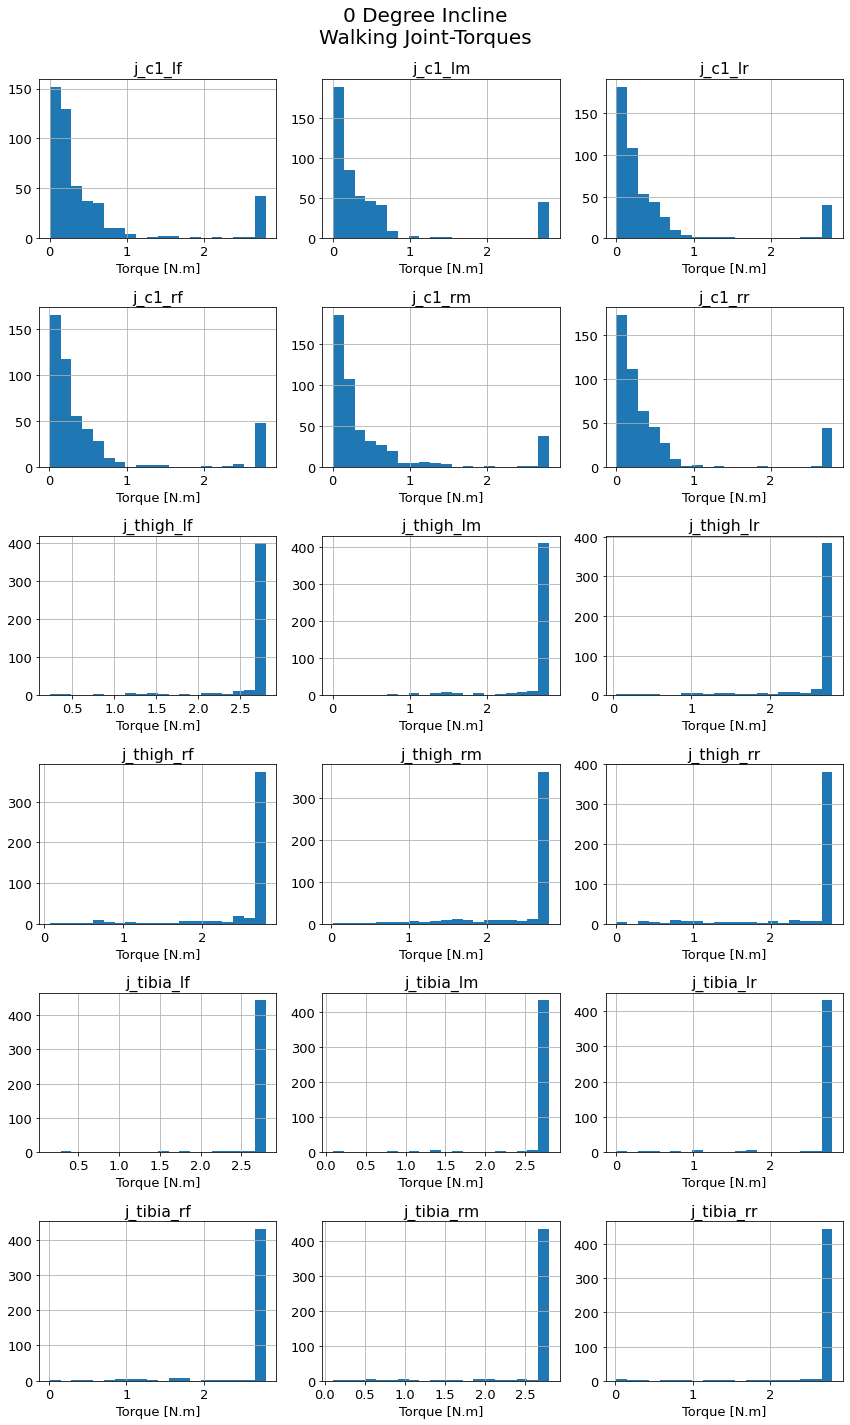

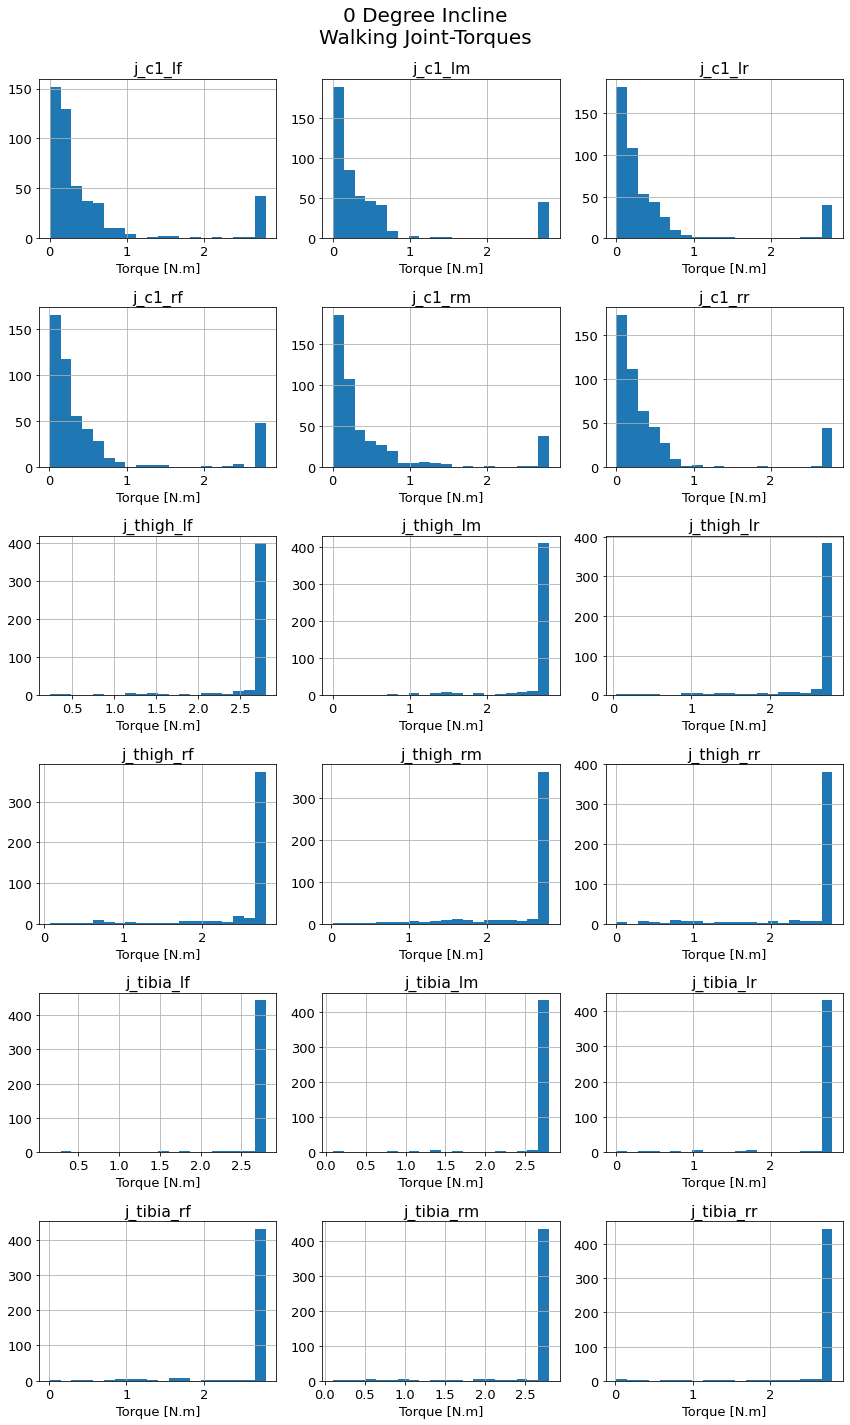

## Plot just one for visualization

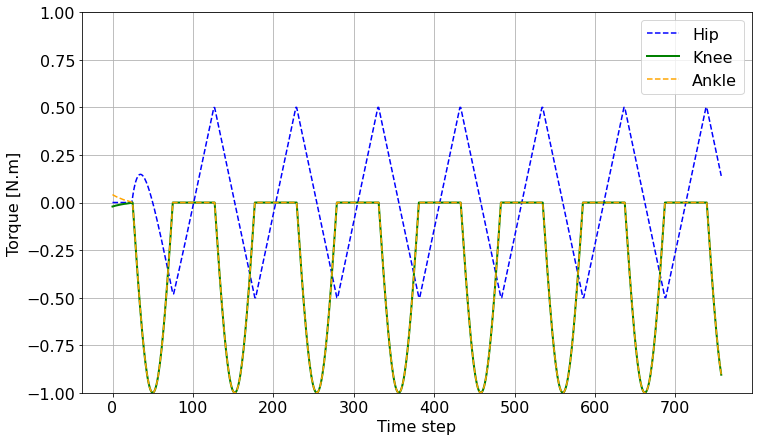

In [134]:
position = 'lf'
plt.figure(figsize=(12, 7))
plt.rcParams.update({'font.size': 16})
plt.plot(torques_deg_0[f'Torque_j_c1_{position}'], label = 'Hip', c = 'b', ls = '--')
plt.plot(torques_deg_0[f'Torque_j_thigh_{position}'], label = 'Knee', c= 'g', lw = 2)
plt.plot(torques_deg_0[f'Torque_j_tibia_{position}'], label = 'Ankle', c = 'orange', ls = '--', alpha = 1) 
plt.legend()
plt.grid()
plt.ylabel('Torque [N.m]')
plt.xlabel('Time step')
plt.ylim([-1, 1])
plt.show()